Dependencies:
```python
!pip install jupysql duckdb-engine
!pip install git+https://github.com/deepset-ai/haystack.git@main#egg=haystack-ai
!pip install pandas
!pip install notebook
!pip install python-dotenv
```

## DuckDB

DuckDB es un sistema de base de datos en memoria diseñado para cargas de trabajo analíticas. Esto significa que sobresale en el manejo de tareas complejas de análisis de datos que se realizan directamente en la memoria del dispositivo, en lugar de un servidor separado. Estas son algunas de las características clave de DuckDB:

**Velocidad:** DuckDB es conocido por su rápido rendimiento en consultas analíticas, logrado mediante el uso de un motor de almacenamiento en columnas y el soporte para la ejecución paralela.

**Facilidad de uso:** DuckDB es conocido por ser simple de configurar y usar. Se dice que puede estar funcionando con DuckDB en solo unos minutos.

**Portabilidad:** DuckDB se ejecuta en una variedad de sistemas operativos, incluidos Linux, macOS y Windows, y se puede usar en diferentes arquitecturas de hardware.

**Soporte SQL:** DuckDB ofrece un potente dialecto SQL que incluye funciones como consultas anidadas, funciones de ventana y funciones definidas por el usuario.

**Código abierto:** DuckDB es un proyecto de código abierto disponible gratuitamente bajo la licencia permisiva MIT.

En resumen, DuckDB es una opción potente y fácil de usar para analistas y científicos de datos que necesitan realizar consultas SQL rápidas en sus datos.


## HAYSTACK AI

Haystack es un proyecto de inteligencia artificial (IA) de código abierto creado por Facebook. Haystack se centra en facilitar la búsqueda y extracción de información específica a partir de grandes conjuntos de documentos ([https://www.project-haystack.org/](https://www.project-haystack.org/)), como artículos, correos electrónicos o código fuente. 

Haystack funciona mediante la combinación de varios enfoques de IA, incluyendo:

* **Recuperación de información:** Encontrar los documentos más relevantes para una consulta determinada.
* **Pregunta y respuesta:** Proporcionar respuestas directas a preguntas formuladas en lenguaje natural.
* **Extracción de texto:** Identificar y extraer información clave de los documentos, como fechas, nombres o lugares.

Haystack se puede utilizar para una variedad de tareas, como:

* Buscar y resumir documentos internos de una empresa.
* Entrenar chatbots para que puedan responder a preguntas de los clientes.
* Desarrollar motores de búsqueda personalizados.

Si deseas aprender más sobre Haystack, puedes consultar la documentación oficial del proyecto [https://www.project-haystack.org/](https://www.project-haystack.org/).

## SQLTwerk


In [1]:

# from urllib.request import urlretrieve
# from zipfile import ZipFile
import pandas as pd


In [3]:

# url = "https://archive.ics.uci.edu/static/public/445/absenteeism+at+work.zip"

# # download the file
# urlretrieve(url, "Absenteeism_at_work_AAA.zip")

# print("Extracting the Absenteeism at work dataset...")
# # Extract the CSV file
# with ZipFile("Absenteeism_at_work_AAA.zip", 'r') as zf:
#     zf.extractall()

# Check the extracted CSV file name (in this case, it's "Absenteeism_at_work.csv")
# csv_file_name = "Absenteeism_at_work.csv"


df = pd.read_table('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', 
                      sep='|', index_col='user_id')


# print("Cleaning up the Absenteeism at work dataset...")
# # Data clean up
# df = pd.read_csv(csv_file_name, sep=",")
# df.columns = df.columns.str.replace(' ', '_')

# # Save the cleaned up CSV file
df.to_csv("OOCUPATION.csv", index=False)

In [4]:
%load_ext sql

In [5]:
%sql duckdb:///occupation.duck.db

Connecting to 'duckdb:///occupation.duck.db'

In [6]:
%%sql
create or replace table occupation as
from read_csv_auto('OOCUPATION.csv', header=True, sep=',')

Running query in 'duckdb:///occupation.duck.db'

Count


In [7]:
from typing import List
from haystack import component

@component
class SQLQuery:

    def __init__(self):
      %reload_ext sql

    @component.output_types(results=List[str], queries=List[str])
    def run(self, queries: List[str]):
        results = []
        for query in queries:
          result = %sql {{query}}
          results.append(f"{result}")
        return {"results": results, "queries": queries}

In [8]:
sql_query = SQLQuery()

In [9]:
result = sql_query.run(queries=['SELECT * from occupation;'])
print(result["results"][0])

Running query in 'duckdb:///occupation.duck.db'

+-----+--------+---------------+----------+
| age | gender |   occupation  | zip_code |
+-----+--------+---------------+----------+
|  24 |   M    |   technician  |  85711   |
|  53 |   F    |     other     |  94043   |
|  23 |   M    |     writer    |  32067   |
|  24 |   M    |   technician  |  43537   |
|  33 |   F    |     other     |  15213   |
|  42 |   M    |   executive   |  98101   |
|  57 |   M    | administrator |  91344   |
|  36 |   M    | administrator |  05201   |
|  29 |   M    |    student    |  01002   |
|  53 |   M    |     lawyer    |  90703   |
+-----+--------+---------------+----------+
Truncated to displaylimit of 10.


In [10]:
# !pip install python-dotenv
# !pip install "huggingface_hub>=0.23.0"

In [11]:
import os
from dotenv import load_dotenv

load_dotenv(r"C:\Users\Ort\.env")

True

In [21]:
from haystack.components.generators import chat

In [22]:
chat??

Type:        module
String form: <module 'haystack.components.generators.chat' from 'c:\\Users\\Ort\\miniconda3\\envs\\nlp_env\\lib\\site-packages\\haystack\\components\\generators\\chat\\__init__.py'>
File:        c:\users\ort\miniconda3\envs\nlp_env\lib\site-packages\haystack\components\generators\chat\__init__.py
Source:     
# SPDX-FileCopyrightText: 2022-present deepset GmbH <info@deepset.ai>
#
# SPDX-License-Identifier: Apache-2.0

from haystack.components.generators.chat.openai import (  # noqa: I001 (otherwise we end up with partial imports)
    OpenAIChatGenerator,
)
from haystack.components.generators.chat.azure import AzureOpenAIChatGenerator
from haystack.components.generators.chat.hugging_face_local import HuggingFaceLocalChatGenerator
from haystack.components.generators.chat.hugging_face_tgi import HuggingFaceTGIChatGenerator
from haystack.components.generators.chat.hugging_face_api import HuggingFaceAPIChatGenerator

__all__ = [
    "HuggingFaceLocalChatGenerator",
    "

In [13]:
from haystack.components.generators import HuggingFaceAPIGenerator
# from haystack.utils import Secret

generator = HuggingFaceAPIGenerator(api_type="serverless_inference_api",
                                    api_params={"model": "HuggingFaceH4/zephyr-7b-beta"}
                                    # api_params={"model": "meta-llama/Meta-Llama-3-8B"}
                                    
                                    )

result = generator.run(prompt="What's Natural Language Processing?")
print(result)

{'replies': ['\n\nNatural Language Processing (NLP) is a subfield of Artificial Intelligence (AI) and Computer Science that deals with the interactions between computers and human (natural) languages. NLP is a complex field that involves a variety of techniques from linguistics, computer science, and artificial intelligence.\n\nNLP is used to enable computers to understand, interpret, and generate human language. It is a critical component of many AI applications, including virtual assistants, chatbots, search engines, and language translation services.\n\nNLP is essential for AI systems to understand and respond to human language in a more natural and intuitive way. It allows computers to process and analyze large volumes of text, identify patterns and relationships, and generate insights and recommendations based on that analysis.\n\nNLP is also used to improve the accuracy and efficiency of language translation services, making it easier for people to communicate across language bar

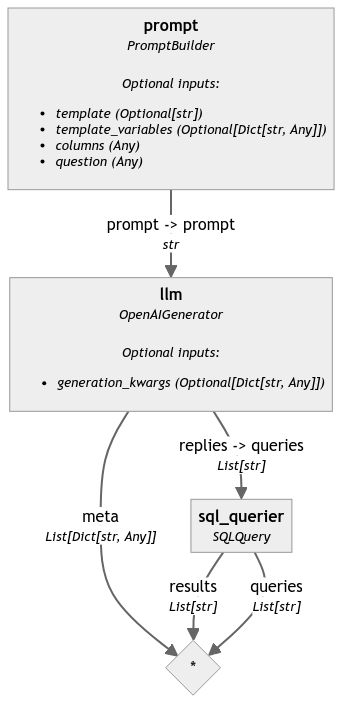

In [17]:
from haystack import Pipeline
from haystack.components.builders import PromptBuilder
from haystack.components.generators.openai import OpenAIGenerator

prompt = PromptBuilder(template="""Please generate an SQL query. IMPORTATNT: **Generate ONLY the query, no more.** The query should answer the following Question: {{question}};
            The query is to be answered for the table is called 'OCCUPATION' with the following
            Columns: {{columns}};
            Answer (sql query only): """)
sql_query = SQLQuery()
llm = OpenAIGenerator(model="gpt-3.5-turbo")
# llm = generator

sql_pipeline = Pipeline()
sql_pipeline.add_component("prompt", prompt)
sql_pipeline.add_component("llm", llm)
sql_pipeline.add_component("sql_querier", sql_query)

sql_pipeline.connect("prompt", "llm")
sql_pipeline.connect("llm.replies", "sql_querier.queries")

# If you want to draw the pipeline, uncomment below 👇
sql_pipeline.show()

In [18]:
def get_query(query, ret=False):

    result = sql_pipeline.run({"prompt": {"question": query,
                                "columns": ', '.join(df.columns)}})

    print(result["sql_querier"]["results"][0])
    if ret:
        return result["sql_querier"]["results"][0]

In [19]:
get_query("what is the mean age per occupation", True)

Running query in 'duckdb:///occupation.duck.db'

+---------------+--------------------+
|   occupation  |      mean_age      |
+---------------+--------------------+
|   homemaker   | 32.57142857142857  |
|    engineer   | 36.38805970149254  |
|      none     | 26.555555555555557 |
|    educator   | 42.01052631578948  |
| entertainment | 29.22222222222222  |
|    salesman   | 35.666666666666664 |
|     other     | 34.523809523809526 |
|   healthcare  |      41.5625       |
|    retired    | 63.07142857142857  |
|   librarian   |        40.0        |
+---------------+--------------------+
Truncated to displaylimit of 10.


'+---------------+--------------------+\n|   occupation  |      mean_age      |\n+---------------+--------------------+\n|   homemaker   | 32.57142857142857  |\n|    engineer   | 36.38805970149254  |\n|      none     | 26.555555555555557 |\n|    educator   | 42.01052631578948  |\n| entertainment | 29.22222222222222  |\n|    salesman   | 35.666666666666664 |\n|     other     | 34.523809523809526 |\n|   healthcare  |      41.5625       |\n|    retired    | 63.07142857142857  |\n|   librarian   |        40.0        |\n+---------------+--------------------+\nTruncated to displaylimit of 10.'

In [20]:
query = "For each occupation, calculate the minimum and maximum ages"
get_query(query, False)

Running query in 'duckdb:///occupation.duck.db'

+---------------+----------+----------+
|   occupation  | min(age) | max(age) |
+---------------+----------+----------+
|   homemaker   |    20    |    50    |
|    engineer   |    22    |    70    |
|      none     |    11    |    55    |
|     other     |    13    |    64    |
|   healthcare  |    22    |    62    |
|    retired    |    51    |    73    |
|   technician  |    21    |    55    |
|     writer    |    18    |    60    |
|   librarian   |    23    |    69    |
| administrator |    21    |    70    |
+---------------+----------+----------+
Truncated to displaylimit of 10.


https://adamcowley.co.uk/posts/llm-sql-duckdb/

In [19]:
!pip install cohere

  Using cached tokenizers-0.15.2-cp311-none-win_amd64.whl.metadata (6.8 kB)
  Using cached fsspec-2024.3.1-py3-none-any.whl.metadata (6.8 kB)
   ---------------------------------------- 0.0/150.6 kB ? eta -:--:--
   -------------------------------------- - 143.4/150.6 kB 4.3 MB/s eta 0:00:01
   ---------------------------------------- 150.6/150.6 kB 4.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/499.4 kB ? eta -:--:--
   --------------------------------------- 499.4/499.4 kB 30.6 MB/s eta 0:00:00
Using cached tokenizers-0.15.2-cp311-none-win_amd64.whl (2.2 MB)
   ---------------------------------------- 0.0/388.9 kB ? eta -:--:--
   --------------------------------------- 388.9/388.9 kB 23.7 MB/s eta 0:00:00
Using cached fsspec-2024.3.1-py3-none-any.whl (171 kB)


In [22]:
cohere.Client??

Init signature:
cohere.Client(
    api_key: Union[str, Callable[[], str], NoneType] = None,
    *,
    base_url: Optional[str] = None,
    environment: cohere.environment.ClientEnvironment = <ClientEnvironment.PRODUCTION: 'https://api.cohere.ai/v1'>,
    client_name: Optional[str] = None,
    timeout: Optional[float] = None,
    httpx_client: Optional[httpx.Client] = None,
)
Docstring:     
Use this class to access the different functions within the SDK. You can instantiate any number of clients with different configuration that will propogate to these functions.

Parameters:
    - base_url: typing.Optional[str]. The base url to use for requests from the client.

    - environment: ClientEnvironment. The environment to use for requests from the client. from .environment import ClientEnvironment

                                      Defaults to ClientEnvironment.PRODUCTION

    - client_name: typing.Optional[str].

    - token: typing.Optional[typing.Union[str, typing.Callable[[], str]

In [24]:
co.chat_stream??

Signature:
co.chat_stream(
    *,
    message: str,
    model: Optional[str] = Ellipsis,
    preamble: Optional[str] = Ellipsis,
    chat_history: Optional[Sequence[cohere.types.chat_message.ChatMessage]] = Ellipsis,
    conversation_id: Optional[str] = Ellipsis,
    prompt_truncation: Union[Literal['OFF', 'AUTO', 'AUTO_PRESERVE_ORDER'], Any, NoneType] = Ellipsis,
    connectors: Optional[Sequence[cohere.types.chat_connector.ChatConnector]] = Ellipsis,
    search_queries_only: Optional[bool] = Ellipsis,
    documents: Optional[Sequence[Dict[str, str]]] = Ellipsis,
    temperature: Optional[float] = Ellipsis,
    max_tokens: Optional[int] = Ellipsis,
    max_input_tokens: Optional[int] = Ellipsis,
    k: Optional[int] = Ellipsis,
    p: Optional[float] = Ellipsis,
    seed: Optional[float] = Ellipsis,
    stop_sequences: Optional[Sequence[str]] = Ellipsis,
    frequency_penalty: Optional[float] = Ellipsis,
    presence_penalty: Optional[float] = Ellipsis,
    raw_prompting: Optional[boo

In [25]:
import cohere

co = cohere.Client(
    api_key="Z0lAcRtcETdMxvQKThAbZ77lsexoEcyP7QHK44n2",
)

stream = co.chat_stream(
    message="Hablame como chiquito de la calzada",
    model="command-r-plus"
)

for event in stream:
    if event.event_type == "text-generation":
        print(event.text, end='')

¡Jó, qué gustazo me da estar aquí contigo, chiquitín! ¿Cómo estás, fenómene? Espero que estés más contento que un tonto con un lápiz, oye. Aquí estoy yo, el Chiquito de la Calzada, dispuesto a darte mucha alegría y a hacerte reír hasta que te caigas de la silla, ¡jajajá!

¿Qué quieres que te cuente, pecador? ¿Quieres que te cuente un chistecillo? Pues allá va uno:

Había una vez un hombre que iba por la calle con un perro. Y el perro se para en una esquina y dice: "Aquí me bajé del autobús". ¡Jajajá! ¿A que es bueno, pecador?

Oye, y no te preocupes por nada, que la vida son dos días y uno está nublado. Así que a disfrutar y a ser feliz, que ya vendrán tiempos mejores. Y si no vienen, nos vamos a buscarlos, ¡jajajá!

Un abrazo muy fuerte, chiquitín. Y recuerda: ¡hasta el infinito y más allá!